In [6]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader

import torch
import torch.nn as nn

from torch.optim.adam import Adam


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 9.91M/9.91M [00:25<00:00, 386kB/s] 


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 158kB/s]


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1.65M/1.65M [00:04<00:00, 409kB/s] 


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.48MB/s]


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw

60000
10000


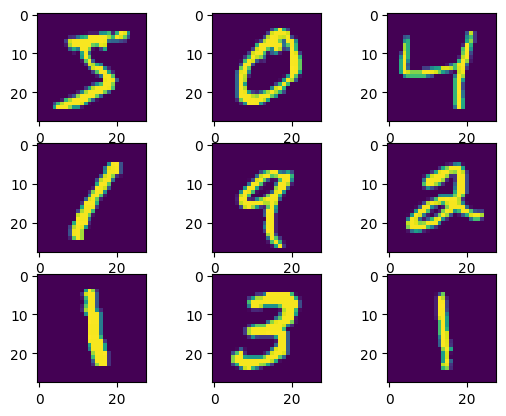

In [3]:
training_data=MNIST(root='./',train=True,download=True,transform=ToTensor())
test_data=MNIST(root='./',train=False,download=True,transform=ToTensor())

print(len(training_data))
print(len(test_data))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(training_data.data[i])
plt.show()


In [5]:
train_loader=DataLoader(training_data,batch_size=32, shuffle=True)
test_loader=DataLoader(test_data,batch_size=32, shuffle=False)


In [7]:
device='cuda' if torch.cuda.is_available() else 'cpu'

model=nn.Sequential(
    nn.Linear(784,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,10)
)

model.to(device)

lr=1e-3
optim=Adam(model.parameters(),lr=lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()

        data=torch.reshape(data,(-1,784)).to(device)
        preds=model(data)

        loss=nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()

    print(f'epoch :{epoch} loss :{loss}')

torch.save(model.state_dict(),'./Model/MNIST.pth')

epoch0 loss0.2723682224750519
epoch1 loss0.21058522164821625
epoch2 loss0.15695525705814362
epoch3 loss0.012039297260344028
epoch4 loss0.07529967278242111
epoch5 loss0.04832512512803078
epoch6 loss0.005140748340636492
epoch7 loss0.09072322398424149
epoch8 loss0.09359236061573029
epoch9 loss0.08493272215127945
epoch10 loss0.006177391856908798
epoch11 loss0.0011718184687197208
epoch12 loss0.00022689728939440101
epoch13 loss0.06258606910705566
epoch14 loss0.01976650580763817
epoch15 loss0.002434456953778863
epoch16 loss0.006874189246445894
epoch17 loss0.0049113621935248375
epoch18 loss0.006918453145772219
epoch19 loss0.0021033904049545527


In [ ]:
model.load_state_dict(torch.load('./Model/MNIST.pth',map_location=device))

num_corr=0

with torch.no_grad():
    for data, label in test_loader:
        data= torch.reshape(data, (-1,784)).to(device)

        output=model(data.to(device)) 
        preds=output.data.max(1)[1] #tensor =[batch,class 순서], max(1)[1]은 가장 높은 값을 갖는 위치를 반환
               
        corr=preds.eq(label.to(device).data).sum().item() #true=1, false=0
        num_corr+=corr

    print(f'Accuracy:{num_corr/len(test_data)}')



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_27988\1615495278.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('./Model/MNIST.

tensor([[-10.0272, -11.0887,  -1.8271,  -0.8323, -19.2553, -10.3575, -39.0960,
          15.9276,  -3.6322,  -4.7827],
        [-14.8596,  -1.9922,  20.0200,  -1.5263, -35.7097, -13.0437, -15.0043,
         -20.7820,  -2.0265, -33.9579],
        [-14.9421,   8.7150,  -4.6668,  -9.0963,  -4.8804, -10.3009,  -7.1969,
          -3.3343,   0.4050, -11.8346],
        [ 20.7773,  -9.7078,  -6.3932, -17.5926, -12.8473,  -7.6402,  -4.8026,
          -8.4473, -21.8340,  -4.8351],
        [-12.5273, -13.1570,  -8.8166, -16.5151,  15.4303, -14.5760, -14.2555,
          -1.4818,  -6.9651,   5.2490],
        [-15.5711,  12.9444, -13.1735, -12.2212,  -5.9563, -17.6172, -16.9255,
          -0.1481,  -3.5043, -10.3646],
        [-16.0382, -19.8197, -19.4194, -14.8833,  16.7694,  -8.3994, -16.9236,
          -3.7382,  -5.2002,   3.5568],
        [-30.3838, -16.6575,  -5.5901,   4.1804,  -8.1630,  -9.7679, -41.3754,
          -3.3772, -13.9869,  11.4966],
        [-22.8163, -12.2084,  -5.0931,  -0.8971,